In [1]:
#!pip install PM4Py

In [2]:
#import pm4py
import pandas as pd
from PIL import Image
import numpy as np

In [3]:
log = pd.read_csv('/content/drive/MyDrive/CourseProject/Test_2/helpdesk.csv', sep=',')
log["CaseID"]=log["CaseID"].apply(str)
log["ActivityID"]=log["ActivityID"].apply(str)
log['CompleteTimestamp']= pd.to_datetime(log['CompleteTimestamp'])
log = log.assign(Activity_Name =lambda x: "Activity_" + x.ActivityID)
log = log[['Activity_Name', 'CaseID', 'CompleteTimestamp']]
log

,Activity_Name,CaseID,CompleteTimestamp
0,Activity_1,2,2012-04-03 16:55:38
1,Activity_8,2,2012-04-03 16:55:53
2,Activity_6,2,2012-04-05 17:15:52
3,Activity_1,3,2010-10-29 18:14:06
4,Activity_8,3,2010-11-04 01:16:11
...,...,...,...
13705,Activity_8,4579,2010-07-26 21:31:59
13706,Activity_6,4579,2010-07-26 21:32:11
13707,Activity_8,4580,2012-01-03 18:33:43
13708,Activity_9,4580,2012-01-11 00:30:11


In [4]:
# получаем уникальные активити
activities = list(log['Activity_Name'].unique())
act_dict = {}

# проводим соответствие между номером и активити
act_num = len(activities)
for i in range(1, act_num+1):
  act_dict[activities[i-1]] = i

act_dict

{'Activity_1': 1,
 'Activity_8': 2,
 'Activity_6': 3,
 'Activity_3': 4,
 'Activity_9': 5,
 'Activity_2': 6,
 'Activity_4': 7,
 'Activity_5': 8,
 'Activity_7': 9}

In [5]:
ids = list(log['CaseID'].unique())
case_logs = []
max_trace_len = 0
for id in ids:
  case_log = log.query("`{0}` == @id".format('CaseID'))
  case_log.sort_values(by=['CompleteTimestamp'])
  recoded_trace = []
  for act in case_log['Activity_Name'].to_numpy():
    recoded_trace.append(act_dict[act])
  
  max_trace_len = max(max_trace_len, len(recoded_trace))

  case_logs.append(recoded_trace)

max_trace_len

14

In [6]:
# паддинг нулями
for trace in case_logs:
  if (len(trace) < max_trace_len):
    trace.extend([0]*(max_trace_len-len(trace)))

[[ 28  56  85 ...   0   0   0]
 [ 28  56  85 ...   0   0   0]
 [ 28  56  85 ...   0   0   0]
 ...
 [ 28  85   0 ...   0   0   0]
 [ 28  56  85 ...   0   0   0]
 [ 56 141  85 ...   0   0   0]]


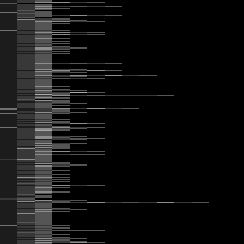

In [10]:
np_matrix = np.asmatrix(case_logs)
np_matrix = np_matrix.astype("uint8")
norm_matrix = np_matrix.copy()
norm_matrix *= 255.0/norm_matrix.max()

print(norm_matrix)
A = np.squeeze(np.asarray(norm_matrix)) 
img = Image.fromarray(A)
#img = img.rotate(90, Image.NEAREST, expand = 1)

img = img.resize((244, 244),Image.NEAREST)

img

In [8]:
img.size

(1400, 38040)